# Taller S.O.S. (Software de Observaciones Sintéticas)

## Simulaciones numéricas como laboratorios virtuales: conectando teoría y observaciones
### Documentación próximamente disponible en [link](https://github.com/MarcialX/sos).

### Este código analiza los cubos de datos simulados de una nube filamentaria, y a partir de observaciones de $^{12}$CO, $^{13}$CO y C$^{18}$O se obtienen propiedades físicas de una Nube Molecular prototipo.

## Parte 1: Propiedades globales de la Nube Molecular:

Las masas de las nubes moleculares se pueden calcular usando tres diferentes métodos:

* Masa calculada mediante el Teorema Virial, $M_{\rm vir}$:

$\Big[ \frac{M_{\rm vir}}{10^4 \, M_\odot} \Big] = 1.58 \times \Big[ \frac{R_e}{5 \, {\rm pc}} \Big] \times \Big[ \frac{\Delta v}{5 \, {\rm km \, s^{-1}}} \Big]^2$, donde $R_e$ es el radio de la nube y $\Delta v$ el ancho de línea.

* Masa calculada con la densidad de columna, $N (^{13}{\rm CO})$, o método ETL, $M_{\rm ETL}$:

$\Big[ \frac{M_{\rm ETL}}{10^4 \, M_\odot} \Big] = 3.25 \times \Big[ \frac{R_e}{5 \, {\rm pc}} \Big]^2 \times \Big[ \frac{N (^{13}{\rm CO})}{10^{17} \, {\rm cm}^{-2}} \Big]$. 

* Masa calculada mediante el factor de conversión ($XF = 2.8 \times 10^{20} {\rm \, cm^{-2} \, K^{-1} \, km^{-1} \, s }$), $M_{\rm XF}$:

$\Big[ \frac{M_{\rm XF}}{10^4 \, M_\odot} \Big] = 3.26 \times \Big[ \frac{R_e}{5 \, {\rm pc}} \Big]^2 \times \Big[ \frac{W (^{13}{\rm CO})}{5 \, {\rm K \, km \, s^{-1}}} \Big]$, 

donde $W (^{13}{\rm CO})$ es la luminosidad de la línea $^{13}{\rm CO}$ que se ralaciona con el factor X y la densidad de columna del hidrógeno molecular, $N({\rm H}_2)$, de la forma $XF \equiv N({\rm H}_2) / W (^{13}{\rm CO})$. 

Ver el artículo de [Ricardo Retes-Romero y colaboradores (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...839..113R/abstract) para una explicación más detallada.

***



### De ser necesario, nos cambiamos al directorio de trabajo:

In [ ]:
#import os
#os.chdir("/ruta/al/paquete/sos")

### Importamos el paquete sos:

In [3]:
import sos

### Especificamos las rutas a los cubos de datos de una Nube Molecular (p.e., TaurusMC)

In [ ]:
#db = sos.mc_db_tools.mc_db(sos.DB_PATH)
#db.get_mc_params('TaurusMC')

### De ser necesario, cargamos los cubos de datos (PPV) manualmente:

In [ ]:
#db.path13CO = './sos/data_cube/filament_13co_YZ_Jansky-per-px.fits'
#db.path12CO = './sos/data_cube/filament_12co_YZ_Jansky-per-px.fits'
#db.pathC18O = './sos/data_cube/filament_c18o_YZ_Jansky-per-px.fits'

### Creamos ahora el objeto "mc", usando su identificador (p.ej., TaurusMC):

In [4]:
mc = sos.mc('MC76')

INFO. Loading data base
Data base loaded
13CO binned initiated
12CO binned initiated
C18O binned initiated
INFO. Loading object parameters
Parameters loaded
INFO. Loading 13CO map
13CO map loaded
INFO. Loading 12CO map
12CO map loaded
INFO. Loading C18O map
C18O map loaded
INFO. Loading Polaritzation map
Polarization map loaded


/home/marcial/Documents/sos/sos/mc_db_tools.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mc_db = yaml.load(file)
/home/marcial/Documents/sos/sos/physics.py:191: RuntimeWarning: invalid value encountered in sqrt
  fyz = 2*np.sqrt(r**2 - y**2 - z**2)


Volume calculated


### Objetos disponibles en la base de datos de SOS:

In [5]:
db_objs = sos.mc_db(sos.DB_PATH) 
db_objs.mc_db.keys()

INFO. Loading data base
Data base loaded


dict_keys(['TaurusMC', 'MC76', 'dummyMC'])

### Creamos los mapas integrados en velocidad de las lineas moleculares disponibles ($^{12}$CO, $^{13}$CO y C$^{18}$O)

In [6]:
mc.get_map_vels()

INFO. Creating integrated velocity maps...
Done


### Creamos los mapas de momento cero M0

In [7]:
sos.msg('Molécula 13CO', 'ok')
m0_data_13co, m0_header_13co = mc.M0('13CO', save=True)
sos.msg('Molécula 12CO', 'ok')
m0_data_12co, m0_header_12co = mc.M0('12CO', save=True)
sos.msg('Molécula C18O', 'ok')
m0_data_c18o, m0_header_c18o = mc.M0('C18O', save=True)

Molécula 13CO
Molécula 12CO
Molécula C18O


## Nube molecular completa. Modo FULL

### Ajustamos las lineas de emision de las moleculas integradas por toda la longitud y latitud:

INFO. Interactive mode


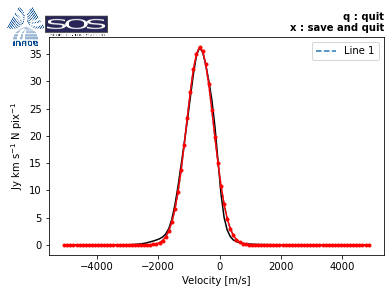

INFO. Interactive mode


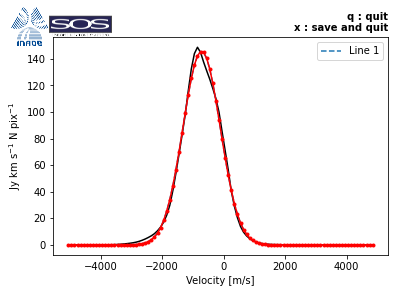

In [9]:
mc.line_fit('13CO', iter=True)
mc.line_fit('12CO', iter=True)
mc.line_fit('C18O', iter=False)

### Calculamos los parametros fisicos de las nubes, como sus masas y densidades columnares. Las masas se calculan por los tres métodos mencionados arriba:

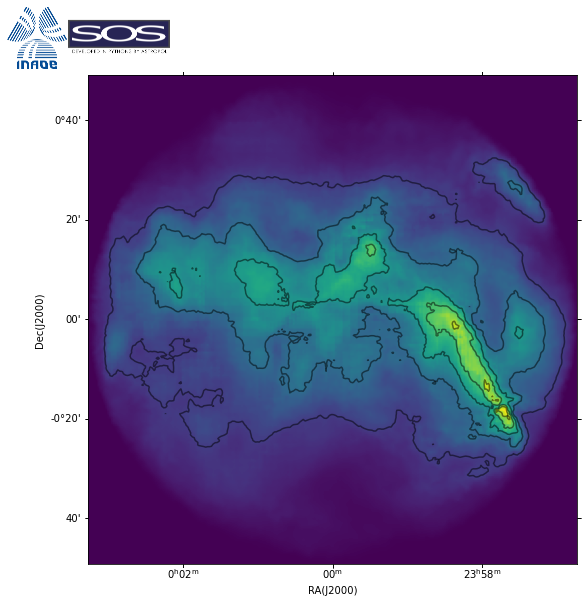

In [19]:
mc_line = mc.mc_full
plt = sos.mc_plotter(mc_line, m0_data_13co, m0_header_13co)
plt.plot_m0('13CO')

In [12]:
mc.get_gral_params()

INFO. Calculating parameters...
Masses done
Column densities done
Excitation Temperature and Effective Radius done


### Desplegamos resultados:

In [13]:
mc.summary()

INFO. ------------------------------------------------
INFO.             Summary Molecular Cloud             
INFO. ------------------------------------------------
MC ID:  MC76
Coupling telescope factor:  2.9647e-14
Distance:  2500.0  pc
Angular diameter:  1.6667
Width line factor:  4.524
Effective radius factor:  0.27
INFO. ------------------------------------------------
INFO.               Physical properties               
INFO. ------------------------------------------------
MASS
LTE mass: 37330.44 Msun
Virial mass: 27346.59 Msun
XF mass: 59968.96 Msun
COLUMN DENSITY
N13CO: 6.58e+15 cm^-1
NH2: 1.49e+22 cm^-1
TEMPERATURE
Excitation temperature: 19.58 K
DIMENSION
Effective radius: 9.82 pc


## Nube molecular segmentada. Modo segmentado o bin

### Dividimos los mapas de todas las moléculas: $^{13}$CO, $^{12}$CO y C$^{18}$O de la nube, en NxN bines:

### La primera segmentación requiere que 'rebin'=True

In [14]:
mc.binning_mol('13CO', 16, rebin=True)

INFO. Starting binning for molecule 13CO
Starting rebinning
Bin 0 created
Bin 1 created
Bin 2 created
Bin 3 created
Bin 4 created
Bin 5 created
Bin 6 created
Bin 7 created

/home/marcial/Documents/sos/sos/physics.py:191: RuntimeWarning: invalid value encountered in sqrt
  fyz = 2*np.sqrt(r**2 - y**2 - z**2)



Bin 8 created
Bin 9 created
Bin 10 created
Bin 11 created
Bin 12 created
Bin 13 created
Bin 14 created
Bin 15 created
Bin 16 created
Bin 17 created
Bin 18 created
Bin 19 created
Bin 20 created
Bin 21 created
Bin 22 created
Bin 23 created
Bin 24 created
Bin 25 created
Bin 26 created
Bin 27 created
Bin 28 created
Bin 29 created
Bin 30 created
Bin 31 created
Bin 32 created
Bin 33 created
Bin 34 created
Bin 35 created
Bin 36 created
Bin 37 created
Bin 38 created
Bin 39 created
Bin 40 created
Bin 41 created
Bin 42 created
Bin 43 created
Bin 44 created
Bin 45 created
Bin 46 created
Bin 47 created
Bin 48 created
Bin 49 created
Bin 50 created
Bin 51 created
Bin 52 created
Bin 53 created
Bin 54 created
Bin 55 created
Bin 56 created
Bin 57 created
Bin 58 created
Bin 59 created
Bin 60 created
Bin 61 created
Bin 62 created
Bin 63 created
Bin 64 created
Bin 65 created
Bin 66 created
Bin 67 created
Bin 68 created
Bin 69 created
Bin 70 created
Bin 71 created
Bin 72 created
Bin 73 created
Bin 74 crea

### El resto ya no lo requiere

In [15]:
mc.binning_mol('12CO', 16)
mc.binning_mol('C18O', 16)

INFO. Starting binning for molecule 12CO
Binning for molecule:12CO
INFO. Binning complete
INFO. Starting binning for molecule C18O
Binning for molecule:C18O
INFO. Binning complete


### Ajustamos las lineas para cada bin

In [16]:
mc.line_fit_binning('13CO')
mc.line_fit_binning('12CO')

### Calculamos los parámetros físicos por cada bin

In [17]:
mc.get_bins_params()

INFO. Calculating binned parameters...
WARNING. B18 Line too low to be consider
WARNING. B226 Line too low to be consider
Done


In [20]:
mc.mc_binned['B135']['mass_lte']

793.9058798639903

In [21]:
mc.mc_binned['B135'].keys()

dict_keys(['pos', 'vol', '13CO', '12CO', 'C18O', 'mass_lte', 'mass_vir', 'mass_xf', 'N13CO', 'NH2', 'Re', 'Tex'])

### Veamos como lucen las líneas de alguna de las moléculas ($^{13}$CO) por cada bin:

16 16


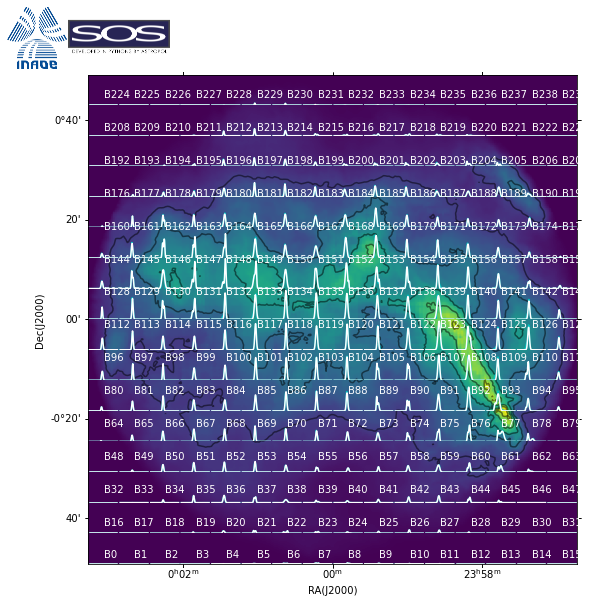

In [23]:
mc_binned = mc.mc_binned
plt = sos.mc_plotter(mc_binned, m0_data_13co, m0_header_13co)
plt.plot_m0_line('13CO', label=True)

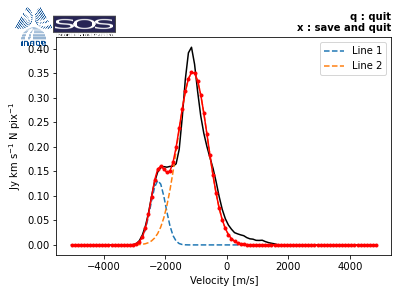

In [24]:
mc.interactive_mode('binned','13CO','B93')

In [26]:
mc.update_tem('binned', '13CO', 'B93')

### Podemos crear un mapa de calor con las propiedades físicas en cada bin. Por ejemplo $M_{\rm LTE}$:

In [31]:
mc.mc_binned['B0'].keys()

dict_keys(['13CO', '12CO', 'C18O', 'pos', 'vol', 'mass_lte', 'mass_vir', 'mass_xf', 'N13CO', 'NH2', 'Re', 'Tex'])

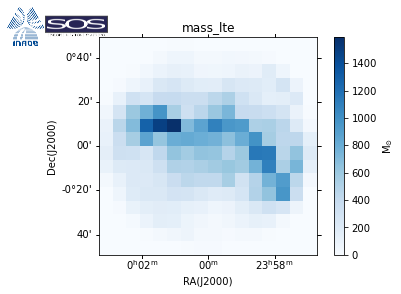

In [34]:
plt.map_param('mass_lte', cmap='Blues', log=False)

### Respaldemos los datos para la siguiente sección:

In [33]:
mc.backup('Parte_1')

Saving molecular cloud full and binned data
Saving molecular cloud data and header
Saving stokes params for molecular cloud
Saving molecular cloud parameters


### Para cargar el respaldo:

In [ ]:
mc.load_bkp('./sos/bkp/Parte_1/')